In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("scholarship.csv")
data.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


C:\Users\amith\AppData\Local\Temp\ipykernel_20716\3147079396.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])


<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

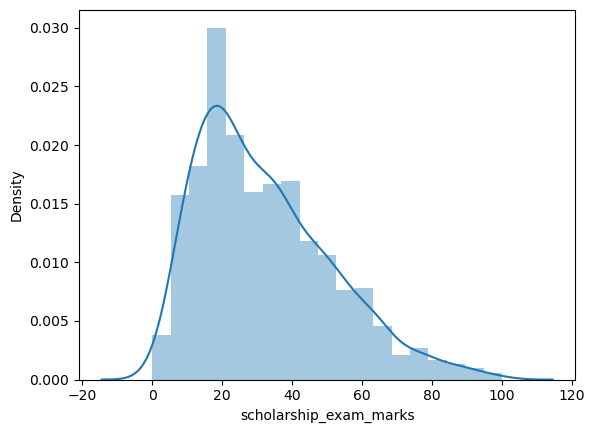

In [9]:
sns.distplot(data["scholarship_exam_marks"])
#skew distribution

## Finding Quantiles { Q1, Q2, Q3} 

In [12]:
q1 = data["scholarship_exam_marks"].quantile(0.25)
q2 = data["scholarship_exam_marks"].quantile(0.5)
q3 = data["scholarship_exam_marks"].quantile(0.75)
print(q1," ", q2," ",q3)

17.0   28.0   44.0


In [14]:
#quantiles can be obtained using describe()
data.describe()

,semester_percentage,scholarship_exam_marks,got_scholarship
count,1000.000000,1000.000000,1000.000000
mean,69.612400,32.225000,0.489000
std,6.158979,19.130822,0.500129
min,48.900000,0.000000,0.000000
25%,65.500000,17.000000,0.000000
50%,69.600000,28.000000,0.000000
75%,73.700000,44.000000,1.000000
max,91.200000,100.000000,1.000000


In [16]:
iqr = q3 - q1
iqr

27.0

In [22]:
minVal = q1 - 1.5*iqr
maxVal = q3 + 1.5*iqr
print(minVal," ", maxVal)

-23.5   84.5


In [24]:
data[(data["scholarship_exam_marks"]<minVal) | (data["scholarship_exam_marks"]>maxVal)]

,semester_percentage,scholarship_exam_marks,got_scholarship
9,77.5,94,1
40,66.0,86,1
61,75.1,86,0
134,63.3,93,0
162,78.0,90,0
283,70.9,87,0
290,83.8,87,0
311,69.7,87,1
324,66.4,90,0
630,65.6,96,1


## Trimming


In [36]:
new_data = data[(data["scholarship_exam_marks"]>minVal)& (data["scholarship_exam_marks"]<maxVal)]
new_data

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


C:\Users\amith\AppData\Local\Temp\ipykernel_20716\2531092104.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])
C:\Users\amith\AppData\Local\Temp\ipykernel_20716\2531092104.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data["scholarship_exam_marks"])


<Axes: >

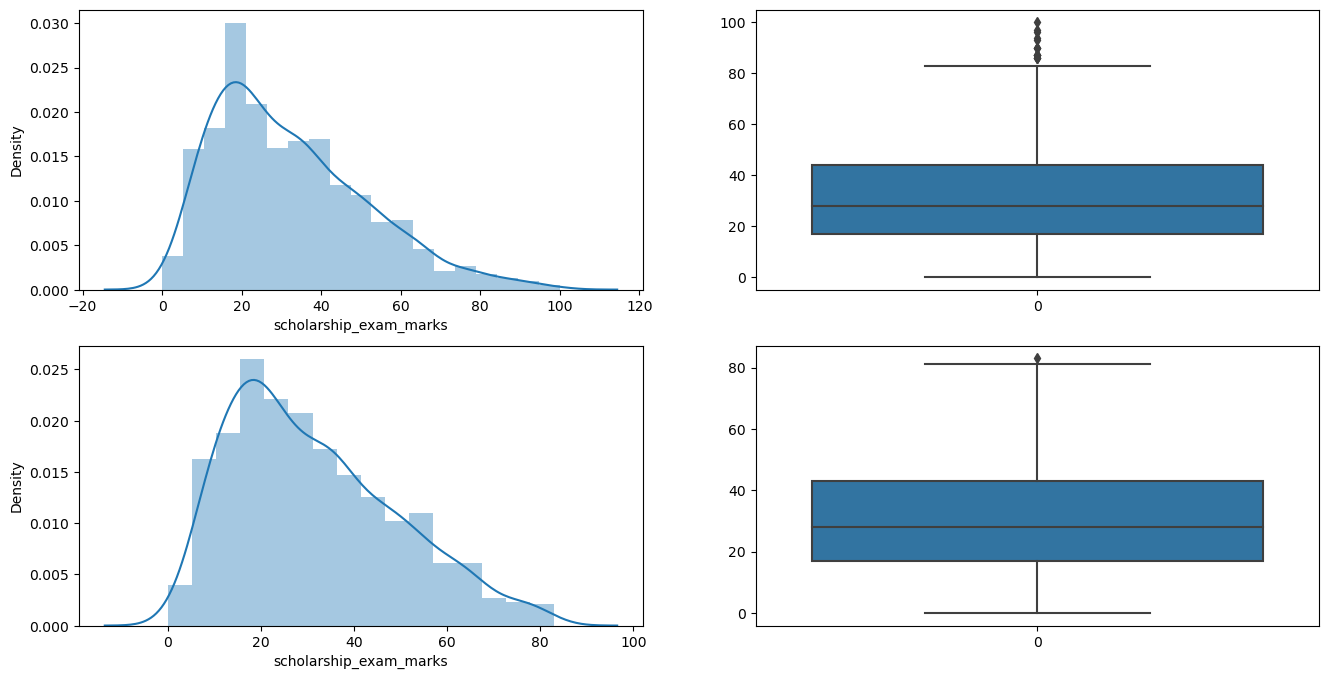

In [40]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(data["scholarship_exam_marks"])

plt.subplot(2,2,2)
sns.boxplot(data["scholarship_exam_marks"])

plt.subplot(2,2,3)
sns.distplot(new_data["scholarship_exam_marks"])

plt.subplot(2,2,4)
sns.boxplot(new_data["scholarship_exam_marks"])

In [42]:
data[(data["scholarship_exam_marks"]>minVal) & (data["scholarship_exam_marks"]<maxVal)]  

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


# Capping


In [44]:
data["scholarship_exam_marks"] = np.where(data["scholarship_exam_marks"]>maxVal, maxVal, 
                                          np.where(data["scholarship_exam_marks"]<minVal, minVal, data["scholarship_exam_marks"]))

In [47]:
data.shape

(1000, 3)

<Axes: >

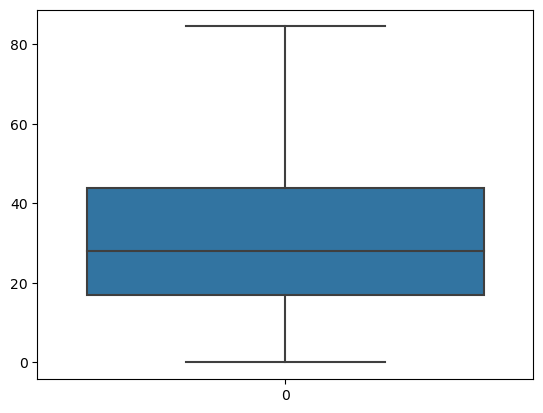

In [53]:
sns.boxplot(data["scholarship_exam_marks"])


C:\Users\amith\AppData\Local\Temp\ipykernel_20716\828206924.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])


<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

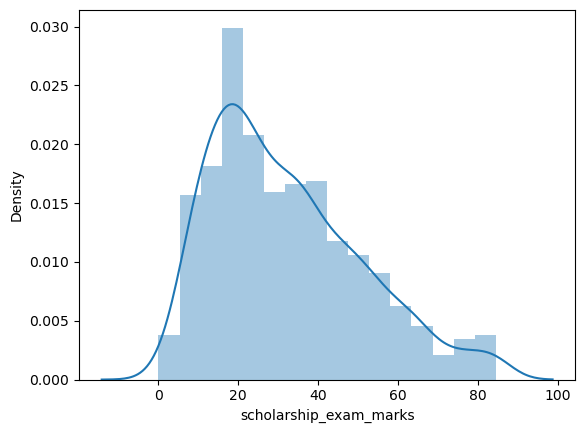

In [51]:
sns.distplot(data["scholarship_exam_marks"])